# Data Understanding and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\user\Documents\datathon\Student_Academic_Records_with_2_Decimal_Places.csv')
data.head()

,Unnamed: 0,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,...,Computer Studies_SecondTerm,Computer Studies_ThirdTerm,Physical and Health Education_FirstTerm,Physical and Health Education_SecondTerm,Physical and Health Education_ThirdTerm,FirstTerm_Attendance,SecondTerm_Attendance,ThirdTerm_Attendance,BehavioralScore,Overall_Percentage
0,0,1001,17,1,0,2,19.83,7,1,2,...,67.00,67.00,46.00,95.00,90.00,98,90,76,3,69.59
1,4,1005,17,1,0,2,4.67,17,1,3,...,74.00,94.00,69.00,97.00,56.00,79,86,78,3,73.15
2,6,1007,15,0,1,1,15.60,10,0,3,...,91.00,99.00,51.00,61.00,61.00,89,88,98,3,72.41
3,7,1008,15,1,1,4,15.42,22,1,1,...,32.47,21.88,21.53,19.06,25.77,94,88,87,2,25.75
4,9,1010,16,1,0,1,18.44,0,0,3,...,93.00,67.00,69.00,68.00,63.00,81,92,82,1,69.13


In [3]:
# Explore the data
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1208 non-null   int64  
 1   StudentID                                 1208 non-null   int64  
 2   Age                                       1208 non-null   int64  
 3   Gender                                    1208 non-null   int64  
 4   Ethnicity                                 1208 non-null   int64  
 5   ParentalEducation                         1208 non-null   int64  
 6   StudyTimeWeekly                           1208 non-null   float64
 7   Absences                                  1208 non-null   int64  
 8   Tutoring                                  1208 non-null   int64  
 9   ParentalSupport                           1208 non-null   int64  
 10  Extracurricular                     

In [4]:
# Convert categorical variables into numerical format
data = pd.get_dummies(data, columns=['Gender', 'Ethnicity'], drop_first=True)

# Normalize or Standardize numerical data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['GPA', 'StudyTimeWeekly']] = scaler.fit_transform(data[['GPA', 'StudyTimeWeekly']])

In [5]:
# Drop the first column
data.drop(data.columns[0], axis=1, inplace=True)

In [6]:
data.head()

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,...,Physical and Health Education_ThirdTerm,FirstTerm_Attendance,SecondTerm_Attendance,ThirdTerm_Attendance,BehavioralScore,Overall_Percentage,Gender_1,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,1001,17,2,1.792969,7,1,2,0,0,1,...,90.00,98,90,76,3,69.59,True,False,False,False
1,1005,17,2,-0.886943,17,1,3,0,0,0,...,56.00,79,86,78,3,73.15,True,False,False,False
2,1007,15,1,1.045210,10,0,3,0,1,0,...,61.00,89,88,98,3,72.41,False,True,False,False
3,1008,15,4,1.013390,22,1,1,1,0,0,...,25.77,94,88,87,2,25.75,True,True,False,False
4,1010,16,1,1.547252,0,0,3,1,0,0,...,63.00,81,92,82,1,69.13,True,False,False,False


# Descriptive Statistics

In [7]:
# Basic statistics
print(data[['GPA', 'StudyTimeWeekly', 'Absences']].describe())

                GPA  StudyTimeWeekly     Absences
count  1.208000e+03     1.208000e+03  1208.000000
mean   1.794003e-16    -4.999680e-17    14.588576
std    1.000414e+00     1.000414e+00     8.581232
min   -2.036013e+00    -1.712484e+00     0.000000
25%   -8.153149e-01    -8.286076e-01     7.000000
50%   -2.293153e-02    -3.067226e-03    15.000000
75%    8.042524e-01     8.158441e-01    22.000000
max    2.247140e+00     1.819486e+00    29.000000


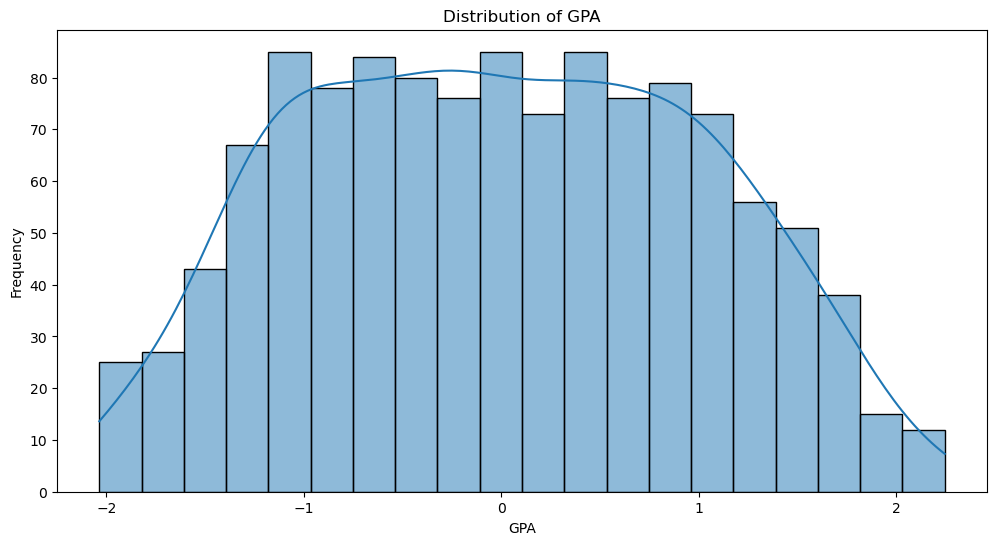

In [8]:
# Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data['GPA'], bins=20, kde=True)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

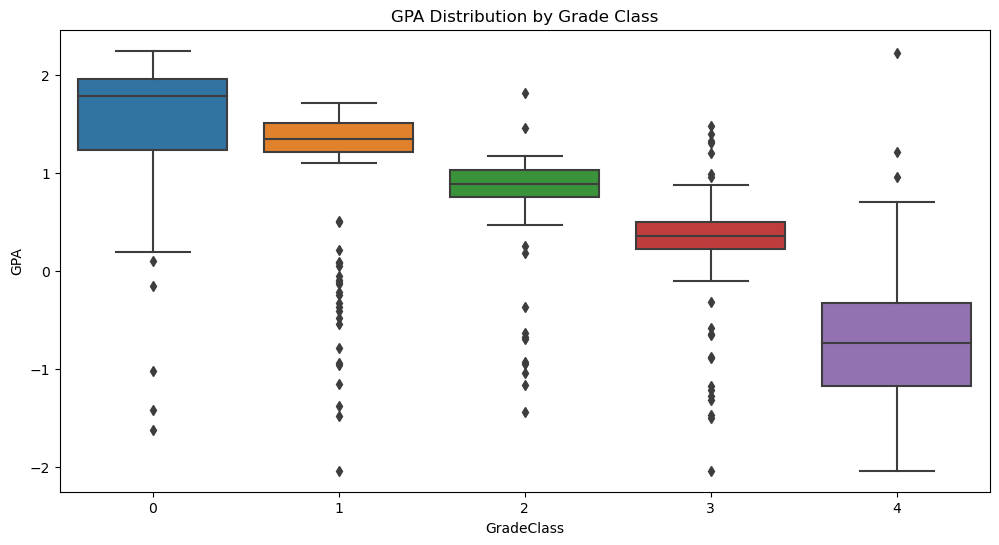

In [9]:
# Box plots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='GradeClass', y='GPA', data=data)
plt.title('GPA Distribution by Grade Class')
plt.show()

# Correlation Analysis


Modified DataFrame with ClassLevel as integers:
   ClassLevel
0           1
1           2
2           2
3           1
4           3

Correlation Matrix:
                    StudentID       Age  ParentalEducation  StudyTimeWeekly  \
StudentID            1.000000 -0.048043           0.005491         0.028926   
Age                 -0.048043  1.000000           0.017825        -0.034971   
ParentalEducation    0.005491  0.017825           1.000000        -0.007248   
StudyTimeWeekly      0.028926 -0.034971          -0.007248         1.000000   
Absences             0.001160 -0.012627           0.009395        -0.022296   
...                       ...       ...                ...              ...   
Overall_Percentage   0.034346  0.067191          -0.005011         0.050502   
Gender_1             0.002751  0.045828           0.018792         0.028855   
Ethnicity_1          0.023978 -0.030805          -0.001758         0.040727   
Ethnicity_2         -0.024413  0.016805           0.0131

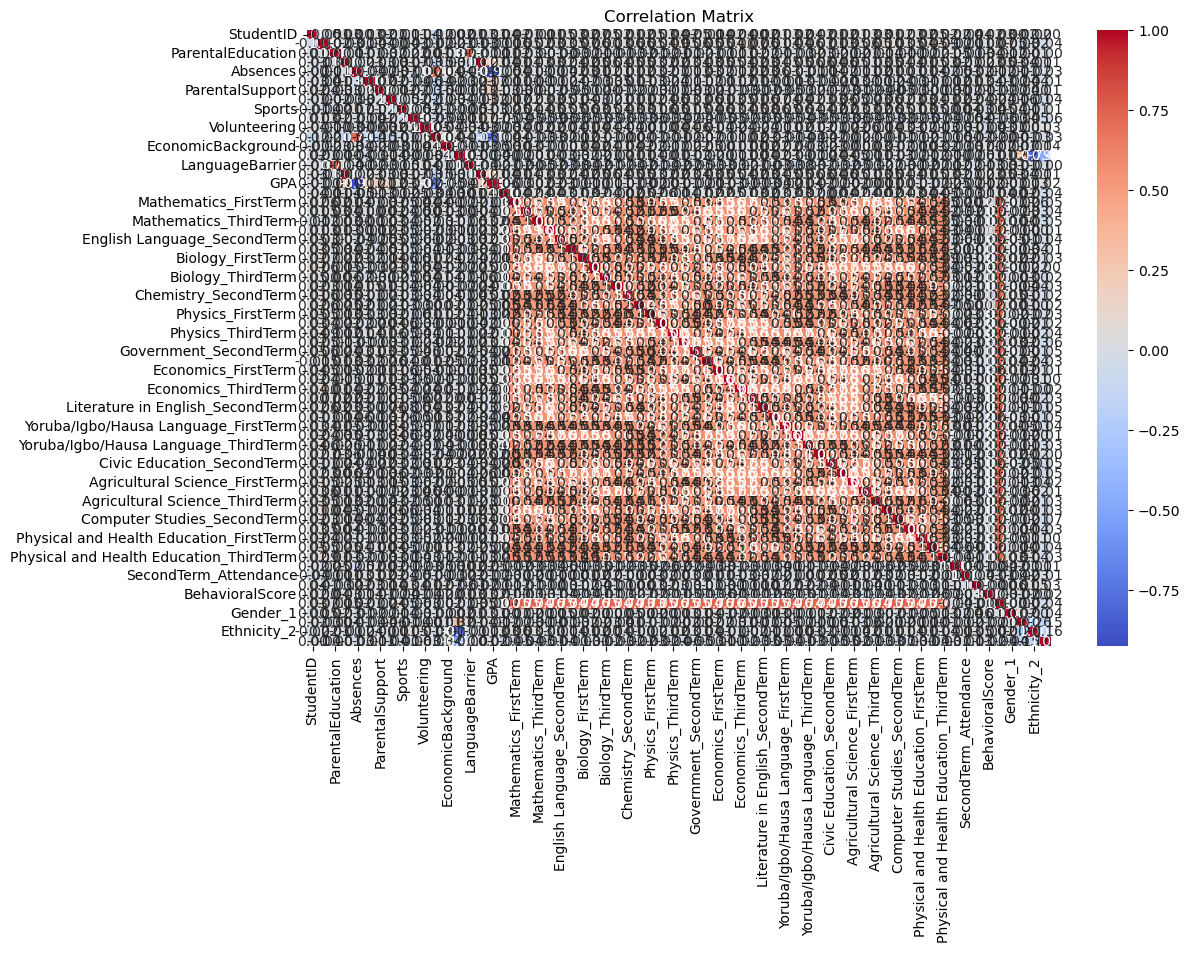

In [10]:
# Remove 'SS' from the 'ClassLevel' entries and convert to integer
data['ClassLevel'] = data['ClassLevel'].str.replace('SS', '').astype(int)

# Display the modified DataFrame
print("\nModified DataFrame with ClassLevel as integers:")
print(data[['ClassLevel']].head())


# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [11]:
from scipy.stats import ttest_ind

# T-test for GPA between students with and without tutoring
tutoring_yes = data[data['Tutoring'] == 1]['GPA']
tutoring_no = data[data['Tutoring'] == 0]['GPA']
t_stat, p_value = ttest_ind(tutoring_yes, tutoring_no)

print(f'T-test: t_stat={t_stat}, p_value={p_value}')

T-test: t_stat=5.927157270946279, p_value=4.01817444547571e-09


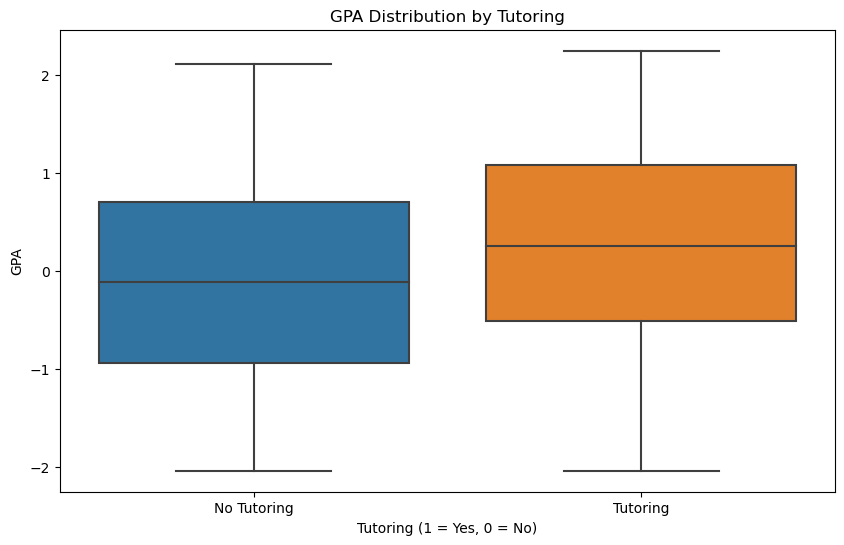

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tutoring', y='GPA', data=data)
plt.title('GPA Distribution by Tutoring')
plt.xlabel('Tutoring (1 = Yes, 0 = No)')
plt.ylabel('GPA')
plt.xticks(ticks=[0, 1], labels=['No Tutoring', 'Tutoring'])
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

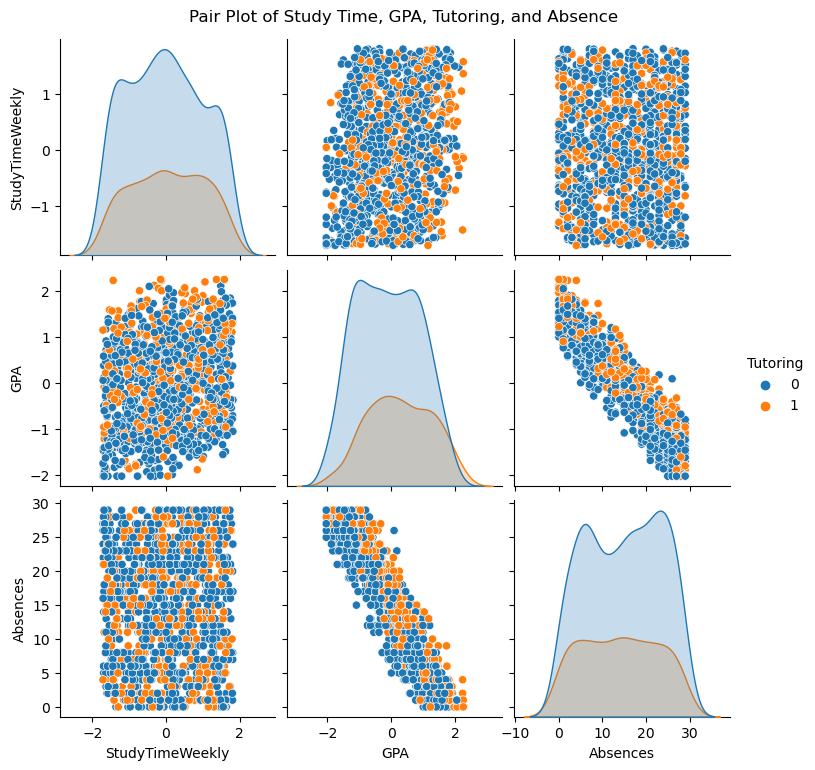

In [22]:
# Selecting relevant columns for the pair plot
pair_plot_data = data[['StudyTimeWeekly', 'GPA', 'Tutoring', 'Absences']]

plt.figure(figsize=(10, 10))
sns.pairplot(pair_plot_data, diag_kind='kde', hue='Tutoring')
plt.suptitle('Pair Plot of Study Time, GPA, Tutoring, and Absence', y=1.02)
plt.show()